# Hypothesis Evaluation

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import time 
from sklearn.datasets import load_boston
from matplotlib import cm
import seaborn as sns
from scipy import stats

In [2]:
boston_dataset = load_boston()

/usr/local/Caskroom/miniconda/base/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Californ

In [3]:
dataFrame = pd.DataFrame(boston_dataset.data, columns = boston_dataset.feature_names)

In [4]:
dataFrame['MEDV'] = boston_dataset.target

In [5]:
input_feature = 'RM'
target = 'MEDV'

## Reshuffle of the Data

In [6]:
dataFrame_shuffled = dataFrame.sample(frac=1)

In [7]:
x = dataFrame_shuffled[[input_feature]].values
y = dataFrame_shuffled[[target]].values
X = dataFrame_shuffled[[input_feature]]
Y = dataFrame_shuffled[[target]]

# Split the dataset into training, validation and test sets

In [8]:
train_X = X.iloc[:int(X.shape[0]*0.6),:]
train_Y = Y.iloc[:int(Y.shape[0]*0.6),:]

val_X = X.iloc[int(X.shape[0]*0.6):int(X.shape[0]*0.6) + int(X.shape[0]*0.2),:]
val_Y = Y.iloc[int(Y.shape[0]*0.6):int(Y.shape[0]*0.6) + int(Y.shape[0]*0.2),:]

test_X = X.iloc[int(X.shape[0]*0.6) + int(X.shape[0]*0.2):,:]
test_Y = Y.iloc[int(Y.shape[0]*0.6) + int(Y.shape[0]*0.2):,:]

In [9]:
print(train_X.shape, train_Y.shape)
print(val_X.shape, val_Y.shape)
print(test_X.shape, test_Y.shape)

(303, 1) (303, 1)
(101, 1) (101, 1)
(102, 1) (102, 1)


## Verifichiamo che le distribuzioni dei 3 split siano uniformi

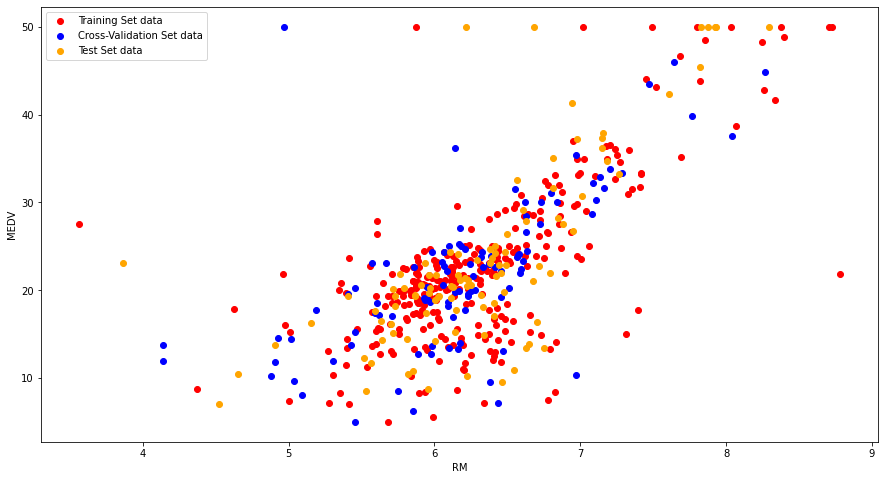

In [10]:
plt.figure(figsize = (15,8))

plt.scatter(train_X, train_Y, label = "Training Set data", c = 'r')
plt.scatter(val_X, val_Y, label = "Cross-Validation Set data", c = 'b')
plt.scatter(test_X, test_Y, label = "Test Set data", c = 'orange')

plt.xlabel('RM')
plt.ylabel('MEDV')
plt.legend()
plt.show()

# Fit the different models on the training set

In [11]:
def polinomyal_features(dataFrame, degree, column):
    
    new_dataFrame = dataFrame.copy()
    for i in range(1,degree):
        column_name = '('+column + ')**{}'.format(i+1)
        new_dataFrame[column_name] = dataFrame[column]**(i+1)

    return new_dataFrame

In [12]:
def normalEquationReg(x, y, lamb = 0.0):
    start_time = time.time()
    
    identity_r = np.eye(x.shape[1])
    identity_r[0][0] = 0
    
    theta = np.linalg.pinv(x.T.dot(x) + lamb * identity_r).dot(x.T).dot(y)
    
    end_time = time.time()
    
    etime = np.round(end_time*1000 - start_time*1000, 3) # [ms]
    return theta, etime

In [13]:
x_poly_2_train = polinomyal_features(train_X,2,input_feature)
x_poly_3_train = polinomyal_features(train_X,3,input_feature)
x_poly_4_train = polinomyal_features(train_X,4,input_feature)

x_poly_2_val = polinomyal_features(val_X,2,input_feature)
x_poly_3_val = polinomyal_features(val_X,3,input_feature)
x_poly_4_val = polinomyal_features(val_X,4,input_feature)

x_poly_2_test = polinomyal_features(test_X,2,input_feature)
x_poly_3_test = polinomyal_features(test_X,3,input_feature)
x_poly_4_test = polinomyal_features(test_X,4,input_feature)

In [14]:
x_linear_train = np.c_[np.ones((train_X.shape[0],1)), train_X]
x_poly_2_train_int = np.c_[np.ones((x_poly_2_train.shape[0],1)), x_poly_2_train]
x_poly_3_train_int = np.c_[np.ones((x_poly_3_train.shape[0],1)), x_poly_3_train]
x_poly_4_train_int = np.c_[np.ones((x_poly_4_train.shape[0],1)), x_poly_4_train]

x_linear_val = np.c_[np.ones((val_X.shape[0],1)), val_X]
x_poly_2_val_int = np.c_[np.ones((x_poly_2_val.shape[0],1)), x_poly_2_val]
x_poly_3_val_int = np.c_[np.ones((x_poly_3_val.shape[0],1)), x_poly_3_val]
x_poly_4_val_int = np.c_[np.ones((x_poly_4_val.shape[0],1)), x_poly_4_val]

x_linear_test = np.c_[np.ones((test_X.shape[0],1)), test_X]
x_poly_2_test_int = np.c_[np.ones((x_poly_2_test.shape[0],1)), x_poly_2_test]
x_poly_3_test_int = np.c_[np.ones((x_poly_3_test.shape[0],1)), x_poly_3_test]
x_poly_4_test_int = np.c_[np.ones((x_poly_4_test.shape[0],1)), x_poly_4_test]

In [15]:
theta_linear, _ = normalEquationReg(x_linear_train, train_Y)
theta_poly_2, _ = normalEquationReg(x_poly_2_train_int, train_Y)
theta_poly_3, _ = normalEquationReg(x_poly_3_train_int, train_Y)
theta_poly_4, _ = normalEquationReg(x_poly_4_train_int, train_Y)

In [16]:
X_2_train, yhat_2_train = zip(*sorted(zip(train_X.values,x_poly_2_train_int.dot(theta_poly_2))))
X_3_train, yhat_3_train = zip(*sorted(zip(train_X.values,x_poly_3_train_int.dot(theta_poly_3))))
X_4_train, yhat_4_train = zip(*sorted(zip(train_X.values,x_poly_4_train_int.dot(theta_poly_4))))

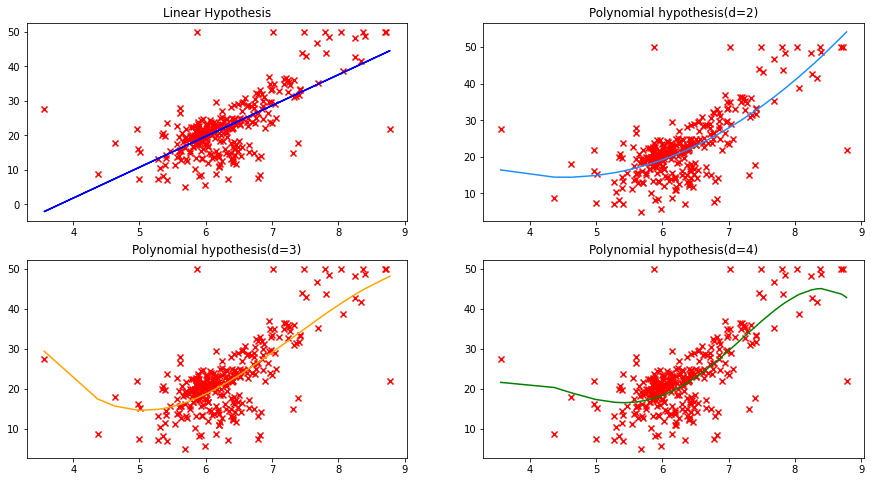

In [17]:
fig = plt.figure(figsize = (15,8))

ax11 = fig.add_subplot(2,2,1)
ax11.set_title("Linear Hypothesis")
ax11.plot(train_X.values, x_linear_train.dot(theta_linear), color='b')
ax11.scatter(train_X, train_Y, marker='x', c='r')

ax12 = fig.add_subplot(2,2,2)
ax12.set_title("Polynomial hypothesis(d=2)")
ax12.plot(X_2_train, yhat_2_train, color="dodgerblue")
ax12.scatter(train_X, train_Y, marker='x', c='r')

ax13 = fig.add_subplot(2,2,3)
ax13.set_title("Polynomial hypothesis(d=3)")
ax13.plot(X_3_train, yhat_3_train, color='orange')
ax13.scatter(train_X, train_Y, marker='x', c='r')

ax21 = fig.add_subplot(2,2,4)
ax21.set_title("Polynomial hypothesis(d=4)")
ax21.plot(X_4_train, yhat_4_train, color='green')
ax21.scatter(train_X, train_Y, marker='x', c='r')

plt.show()

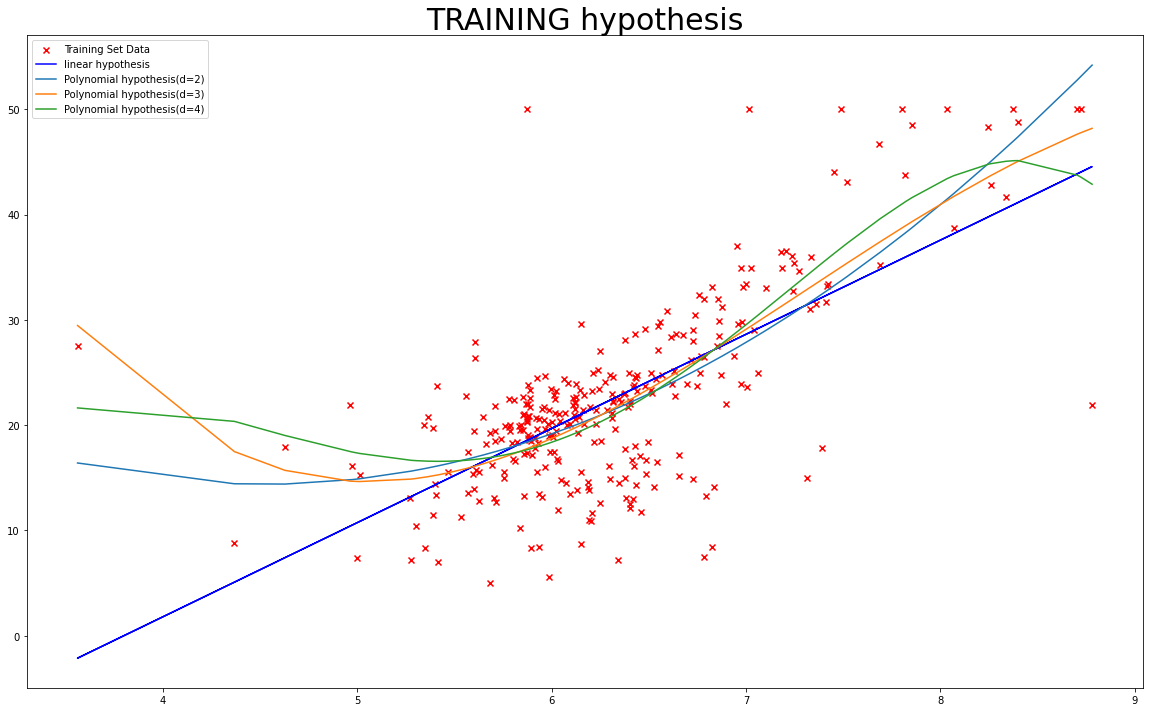

In [18]:
plt.figure(figsize=(20,12))
plt.scatter(train_X, train_Y, marker='x', c='r', label='Training Set Data')
plt.plot(train_X.values, x_linear_train.dot(theta_linear), label='linear hypothesis', c='b')
plt.plot(X_2_train, yhat_2_train, label='Polynomial hypothesis(d=2)')
plt.plot(X_3_train, yhat_3_train, label='Polynomial hypothesis(d=3)')
plt.plot(X_4_train, yhat_4_train, label='Polynomial hypothesis(d=4)')
plt.title('TRAINING hypothesis', fontsize=30)
plt.legend()
plt.show()

# Evaluation on the validation set

Uso la compute cost come metrica (Mean Squared Error)

In [19]:
def costVectorialRegularized(x,y, theta= np.zeros((x.shape[1],1)), lamb = 0.0):
    m = x.shape[0]

    J = 0
    
    elapsed_time = 0
    elapsed_time -= time.time()

    # il primo elemento non lo prendo
    J = (x.dot(theta) - y).T.dot((x.dot(theta) - y)) + lamb*(theta[1:].T.dot(theta[1:]))
    J = J/(2*m)

    elapsed_time += time.time()
    elapsed_time *= 1000 # porto i secondi in millisecondi
    
    return np.round(J[0],3), np.round(elapsed_time,3)

In [20]:
X_2_val, yhat_2_val = zip(*sorted(zip(val_X.values,x_poly_2_val_int.dot(theta_poly_2))))
X_3_val, yhat_3_val = zip(*sorted(zip(val_X.values,x_poly_3_val_int.dot(theta_poly_3))))
X_4_val, yhat_4_val = zip(*sorted(zip(val_X.values,x_poly_4_val_int.dot(theta_poly_4))))

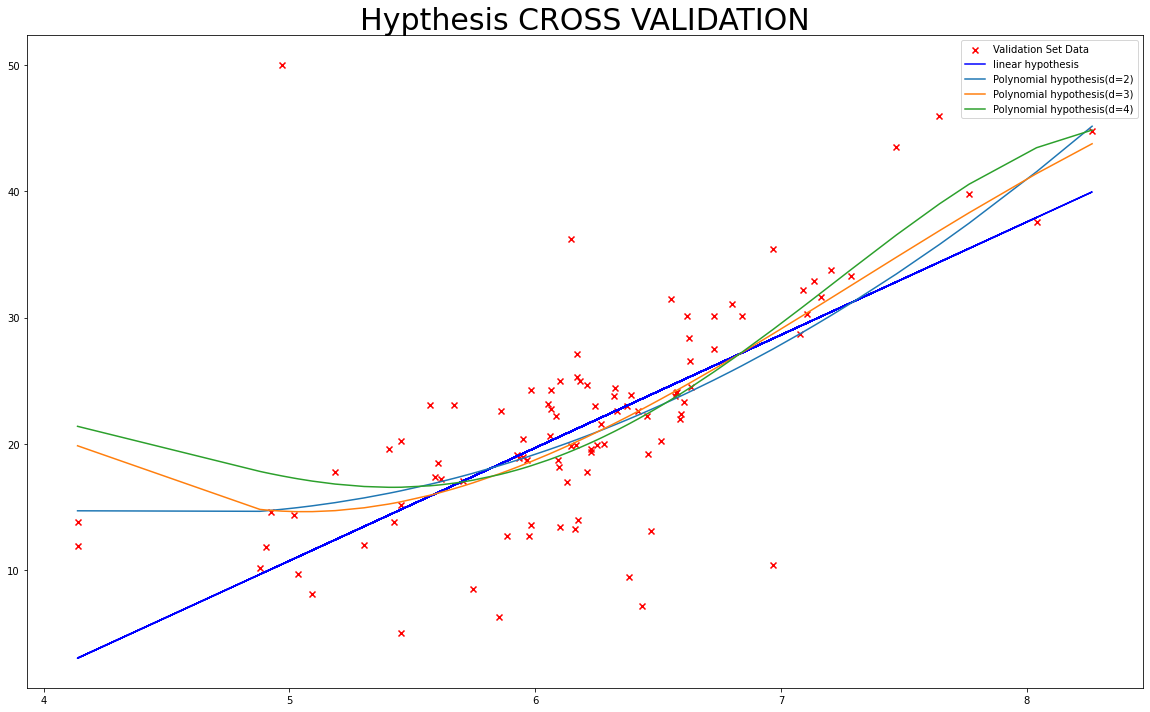

In [21]:
plt.figure(figsize=(20,12))
plt.scatter(val_X, val_Y, marker='x', c='r', label='Validation Set Data')
plt.plot(val_X.values, x_linear_val.dot(theta_linear), label='linear hypothesis', c='b')
plt.plot(X_2_val, yhat_2_val, label='Polynomial hypothesis(d=2)')
plt.plot(X_3_val, yhat_3_val, label='Polynomial hypothesis(d=3)')
plt.plot(X_4_val, yhat_4_val, label='Polynomial hypothesis(d=4)')
plt.title('Hypthesis CROSS VALIDATION', fontsize=30)
plt.legend()
plt.show()

In [22]:
cost_linear, _ = costVectorialRegularized(x_linear_val,val_Y.values, theta_linear, lamb = 0.0)
cost_poly_2, _ = costVectorialRegularized(x_poly_2_val_int,val_Y.values, theta_poly_2, lamb = 0.0)
cost_poly_3, _ = costVectorialRegularized(x_poly_3_val_int,val_Y.values, theta_poly_3, lamb = 0.0)
cost_poly_4, _ = costVectorialRegularized(x_poly_4_val_int,val_Y.values, theta_poly_4, lamb = 0.0)

In [23]:
print('J_val for the linear_hypothesis: {}'.format(cost_linear[0]))
print('J_val for the polynomial_hypothesis(d=2): {}'.format(cost_poly_2[0]))
print('J_val for the polynomial_hypothesis(d=3): {}'.format(cost_poly_3[0]))
print('J_val for the polynomial_hypothesis(d=4): {}'.format(cost_poly_4[0]))

J_val for the linear_hypothesis: 22.406
J_val for the polynomial_hypothesis(d=2): 19.554
J_val for the polynomial_hypothesis(d=3): 19.655
J_val for the polynomial_hypothesis(d=4): 19.545


In [24]:
model_score = [cost_linear, cost_poly_2, cost_poly_3,cost_poly_4]
min_index = model_score.index(min(model_score))

# Inference on the test set with the best model

In [25]:
X_2_test, yhat_2_test = zip(*sorted(zip(test_X.values,x_poly_2_test_int.dot(theta_poly_2))))
X_3_test, yhat_3_test = zip(*sorted(zip(test_X.values,x_poly_3_test_int.dot(theta_poly_3))))
X_4_test, yhat_4_test = zip(*sorted(zip(test_X.values,x_poly_4_test_int.dot(theta_poly_4))))

best_model_X =  val_X.values
best_model_Y =  x_linear_val.dot(theta_linear)

if(min_index == 1):
    best_model_X = X_2_test
    best_model_Y = yhat_2_test
    
if(min_index == 2):
    best_model_X = X_3_test
    best_model_Y = yhat_3_test
    
if(min_index == 3):
    best_model_X = X_4_test
    best_model_Y = yhat_4_test
    


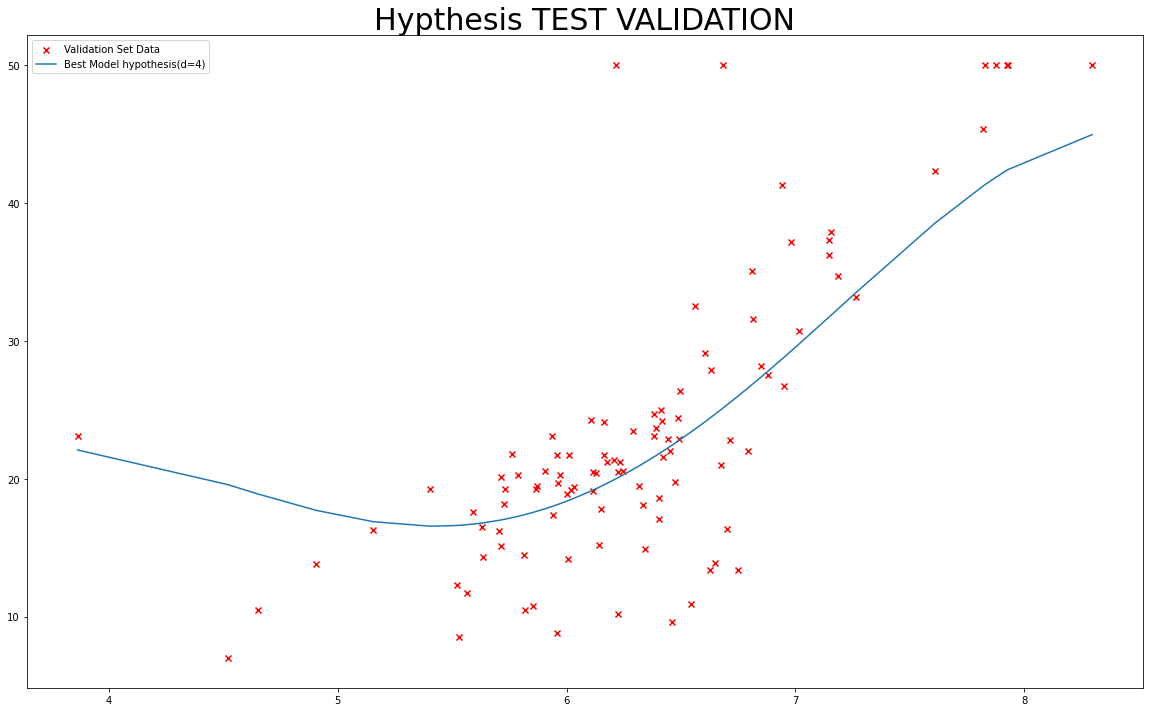

In [26]:
plt.figure(figsize=(20,12))
plt.scatter(test_X, test_Y, marker='x', c='r', label='Validation Set Data')
plt.plot(best_model_X, best_model_Y, label='Best Model hypothesis (d={})'.format(min_index+1))
plt.title('Hypthesis TEST VALIDATION', fontsize=30)
plt.legend()
plt.show()